In [1]:
%cd ../..

/Users/ryandevera/data-science/umn_environments/Deeplifting


In [25]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data_path = './data-queue-2023-10-18/*/*'
files = glob.glob(data_path)
files[:10]

['./data-queue-2023-10-18/2023-10-17-15-ackley/5-layer-128-sum-7-pytorch-lbfgs-sine-sine-True-input-size-1.parquet',
 './data-queue-2023-10-18/2023-10-17-15-ackley/2-layer-128-sum-0-pytorch-lbfgs-sine-sine-False-input-size-1.parquet',
 './data-queue-2023-10-18/2023-10-17-15-ackley/4-layer-128-sum-4-pytorch-lbfgs-sine-sine-False-input-size-1.parquet',
 './data-queue-2023-10-18/2023-10-17-15-ackley/4-layer-128-sum-5-pytorch-lbfgs-sine-sine-True-input-size-1.parquet',
 './data-queue-2023-10-18/2023-10-17-15-ackley/3-layer-128-sum-2-pytorch-lbfgs-sine-sine-False-input-size-1.parquet',
 './data-queue-2023-10-18/2023-10-17-15-ackley/5-layer-128-sum-6-pytorch-lbfgs-sine-sine-False-input-size-1.parquet',
 './data-queue-2023-10-18/2023-10-17-15-ackley/10-layer-128-sum-8-pytorch-lbfgs-sine-sine-False-input-size-1.parquet',
 './data-queue-2023-10-18/2023-10-17-15-ackley/2-layer-128-sum-1-pytorch-lbfgs-sine-sine-True-input-size-1.parquet',
 './data-queue-2023-10-18/2023-10-17-15-ackley/3-layer-128

In [41]:
data = pd.read_parquet(files)
data.head()

,x1,x2,f,f_initial,algorithm,total_time,input_size,hidden_size,num_layers,num_neurons,hidden_activation,output_activation,agg_function,include_bn,problem_name,global_minimum,dimensions,hits
0,9.891555e-01,2.967259e+00,7.180952e+00,18.371942,Deeplifting-LBFGS,56.922843,1,128-128-128-128-128,5,128,sine,sine,sum,True,ackley,0.0,2,False
1,-1.964615e+00,9.824156e-01,5.381864e+00,20.054284,Deeplifting-LBFGS,53.429583,1,128-128-128-128-128,5,128,sine,sine,sum,True,ackley,0.0,2,False
2,2.486189e-11,5.287924e-08,6.701676e-08,20.613405,Deeplifting-LBFGS,159.548124,1,128-128-128-128-128,5,128,sine,sine,sum,True,ackley,0.0,2,True
3,-2.034547e-08,-9.521665e-01,2.579927e+00,19.387476,Deeplifting-LBFGS,58.618590,1,128-128-128-128-128,5,128,sine,sine,sum,True,ackley,0.0,2,False
4,3.099958e+01,-1.299982e+01,1.982764e+01,21.437639,Deeplifting-LBFGS,49.793483,1,128-128-128-128-128,5,128,sine,sine,sum,True,ackley,0.0,2,False


In [11]:
# Let's start by just seeing what we have from the different algorithms
data.groupby(['algorithm'])['problem_name'].unique()

algorithm
Adam                          [ackley]
Deeplifting          [ackley2, ackley]
Deeplifting-LBFGS             [ackley]
Name: problem_name, dtype: object

In [49]:
# Let's filter the deeplifting data because
# the others did not come close to finishing
mask = (
    (data['algorithm'] == 'Deeplifting')
    & (data['problem_name'] == 'ackley')
    & (data['include_bn'] == False)
)

dl_complexity_df = (
    data.loc[mask]
    .groupby(['num_layers', 'num_neurons'])['hits']
    .mean()
    .reset_index()
    .pivot_table(
        index='num_neurons',
        columns='num_layers',
        values='hits',
    )
    .sort_index(ascending=False)
)

<Axes: xlabel='num_layers', ylabel='num_neurons'>

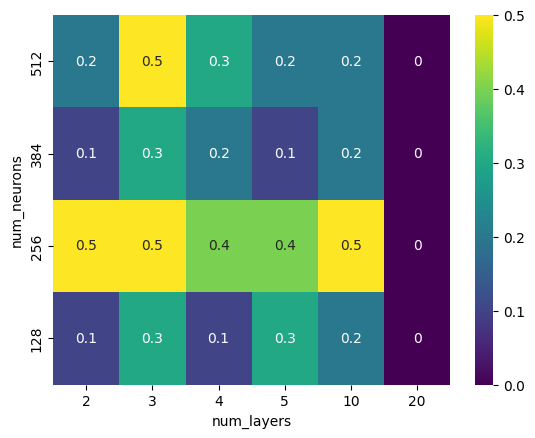

In [50]:
sns.heatmap(dl_complexity_df, cmap='viridis', annot=True)

In [44]:
# What about adam?

In [45]:
# Let's filter the deeplifting data because
# the others did not come close to finishing
adam_complexity_df = (
    data.loc[data['algorithm'] == 'Adam']
    .groupby(['num_layers', 'num_neurons'])['hits']
    .mean()
    .reset_index()
    .pivot_table(
        index='num_neurons',
        columns='num_layers',
        values='hits',
    )
    .sort_index(ascending=False)
)

<Axes: xlabel='num_layers', ylabel='num_neurons'>

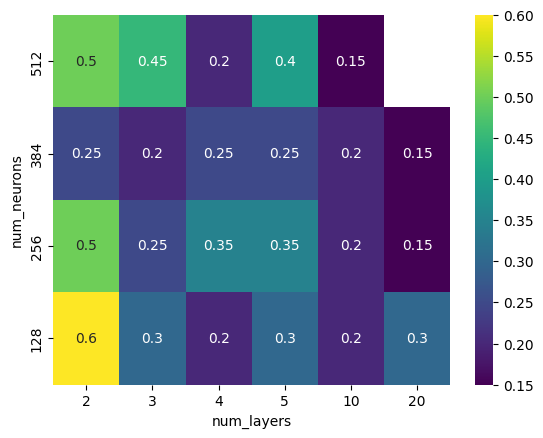

In [46]:
sns.heatmap(adam_complexity_df, cmap='viridis', annot=True)